# Particle Swarm Optimization

Optimización de la función de rastrigin:

- 20 dimensiones
- 100 individuos
- Cien mil iteraciones
- 30 experimentos (corridas)

El parámetro de tamaño del paso $F$ se definió a $0.0005$ para todos los individuos.

Procedimiento: 

1. Se inicializa aleatoriamente con distribución uniforme la población.
2. se elige el individuo con el mejor fitness (el menor valor de Rastrigin).
3. Se calcula el vector al mejor, para cada individuo.
4. Se mueve el individuo hacia el mejor con un tamaño $F$.
5. Se itera la población.


In [2]:
import numpy as np
import pandas as pd
import random
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from multiprocessing import Pool

import time
import copy

In [3]:
n_dims=20
cant_indiv=100
iteraciones=100000
iter_experimentos=30
sigma=0.0005
n_reports=20

min_factible=-5.12 
max_factible=5.12

In [4]:
def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

# Generar un vector de n_dims dimensiones entre los valores factibles.
def rand_vec():
    X_array=[random.uniform(min_factible,max_factible) for i in range(n_dims)]
    return np.array(X_array)

#Nueva posición de la partícula
def next_pos(target,particle_mov):
    if sum(target-particle_mov)==0:
        return particle_mov
    else:
        den_norm=math.sqrt(sum((target-particle_mov)**2))
        return np.array([particle_mov[i]+(((target[i]-particle_mov[i])*sigma)/den_norm) for i in range(len(target))])


def get_best_partic_fit(populat):
    # la partícula con el mejor (mínimo) fitness del enjambre.
    # devuelve las coordenadas, junto con el fitness.
    fit_init=[rastrigin(list(init)) for init in populat]
    ith_best=fit_init.index(min(fit_init))
    return [list(populat[ith_best]),fit_init[ith_best]]

In [27]:
def step_popul(population):
    #Mueve un paso de tamaño sigma una población hacia el mejor (mínimo) fitness
    #Devuelve las nuevas coordenadas de cada partícula
    bst_particl=get_best_partic_fit(population)[0]
    return [next_pos(bst_particl,ith_particl) for ith_particl in population]

In [ ]:
'''
Crear n_corridas de poblaciones
iterar sobre cada población calculando el fitness del mejor y dejándolo avanzar tantas iteraciones como pueda.
'''
PSO_start_time=time.time()

prim_gen=[[rand_vec()for i in xrange(cant_indiv)] for corr in xrange(iter_experimentos)]
best_nCorrds_mIters=[[get_best_partic_fit(ith_popul)[1] for ith_popul in prim_gen]]#Registra el fitness del mejor de cada población por cada iteración
best_nCorrds_mIters_bit=[get_best_partic_fit(ith_popul)[0] for ith_popul in prim_gen]#Registra el mejor individuo de cada población por cada iteración

for corrida in xrange(iteraciones):
    if __name__ == '__main__':
        pool = Pool()
        next_gen=pool.map(step_popul,prim_gen)
        pool.close() 
        pool.join()
    
    prim_gen=next_gen
    fit_dat=np.array([get_best_partic_fit(popul) for popul in next_gen])# El mejor individuo con fitness de cada población para cada corrida
    best_popul=list(fit_dat[:,1])# Regstra el mejor fitness de cada población (dentro de la corrida)
    best_popul_bit=list(fit_dat[:,0])#registra el mejor individuo de cada población
    best_nCorrds_mIters.append(best_popul)
    best_corrida_bit=get_best_partic_fit(list(fit_dat[:,0]))
    best_nCorrds_mIters_bit.append(list(best_corrida_bit[0]))
       
    if corrida %(iteraciones/n_reports)==0:
        print(''.join(["iter: ",str(corrida),"/", str(iteraciones), "| best corrida Fitness: ",str(best_corrida_bit[1])]))
        np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))
        with open("Results_1/PSO_best_part.csv", 'wb') as f:
            writer = csv.writer(f)
            [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

np.savetxt("Results_1/PSO.csv",np.array(best_nCorrds_mIters))
with open("Results_1/PSO_best_part.csv", 'wb') as f:
    writer = csv.writer(f)
    [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

PSO_end_time=time.time()
PSO_exec_time=PSO_end_time-PSO_start_time
print "################################___________________ EXEC TIME:",str(PSO_exec_time)

iter: 0/100000| best corrida Fitness: 229.903874629
iter: 5000/100000| best corrida Fitness: 211.243741452
iter: 10000/100000| best corrida Fitness: 172.779768007
iter: 15000/100000| best corrida Fitness: 155.514904526
iter: 20000/100000| best corrida Fitness: 132.61279864
iter: 25000/100000| best corrida Fitness: 112.281113475
iter: 30000/100000| best corrida Fitness: 111.169176941
iter: 35000/100000| best corrida Fitness: 48.0166791913
iter: 40000/100000| best corrida Fitness: 34.957376976
iter: 45000/100000| best corrida Fitness: 30.4415935749
iter: 50000/100000| best corrida Fitness: 30.4415935749
iter: 55000/100000| best corrida Fitness: 30.4415935749
iter: 60000/100000| best corrida Fitness: 30.4415935749
iter: 65000/100000| best corrida Fitness: 30.4415935749
iter: 70000/100000| best corrida Fitness: 30.4415935749
iter: 75000/100000| best corrida Fitness: 30.4415935749


In [32]:
PSO_exec_time

-7175.31719493866

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


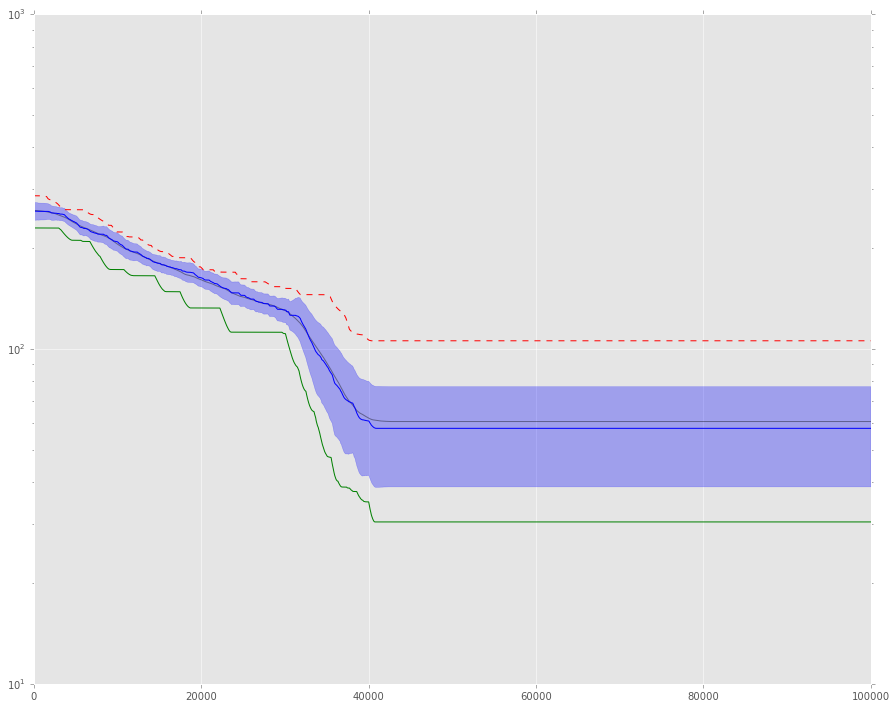

In [5]:
data=np.loadtxt("Results_1/PSO.csv")
best=[]
worst=[]
mean=[]
median=[]
std_median=[]

for iterac in data:
    best.append(min(iterac))
    worst.append(max(iterac))
    mean.append(np.mean(iterac))
    median.append(np.median(iterac))
    std_median.append(np.sqrt(sum([(fit-np.median(iterac))**2 for fit in iterac])/len(iterac)))

plt.figure(figsize=(15,12))
plt.plot(best, "g")
plt.plot(worst, "r--")
plt.plot(mean, "k", alpha=0.4)
plt.plot(median,"b")
plt.fill_between(xrange(len(np.array(median))),
                 np.array(median)+np.array(std_median),
                 np.array(median)-np.array(std_median),
                 alpha=0.3,
                 color="b")
plt.yscale("log")
#plt.savefig("PSO.pdf")
plt.show()

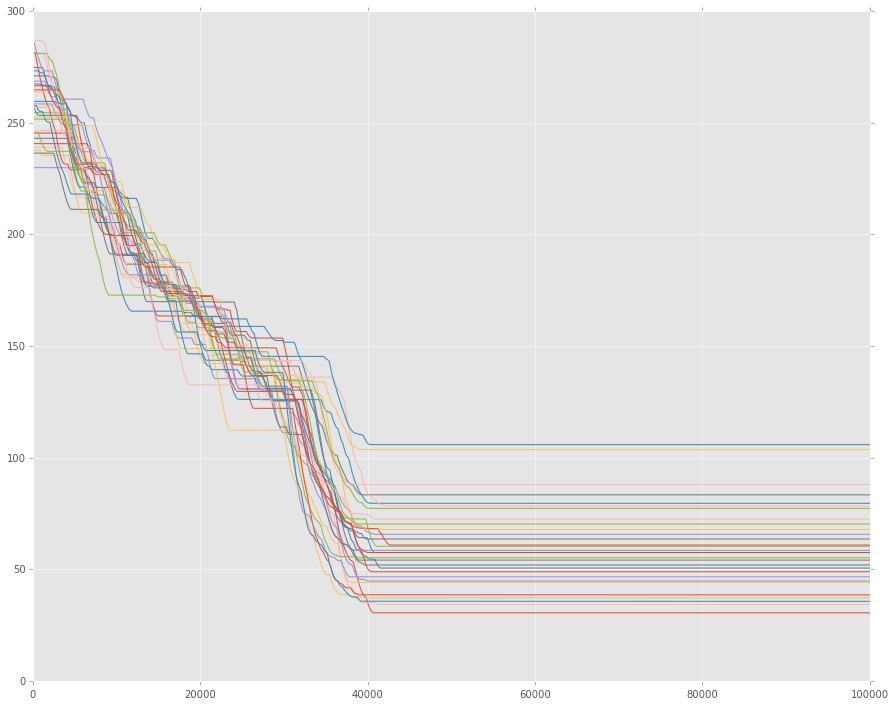

In [37]:
plt.figure(figsize=(15,12))
[plt.plot(dat) for dat in data.T]
plt.show()

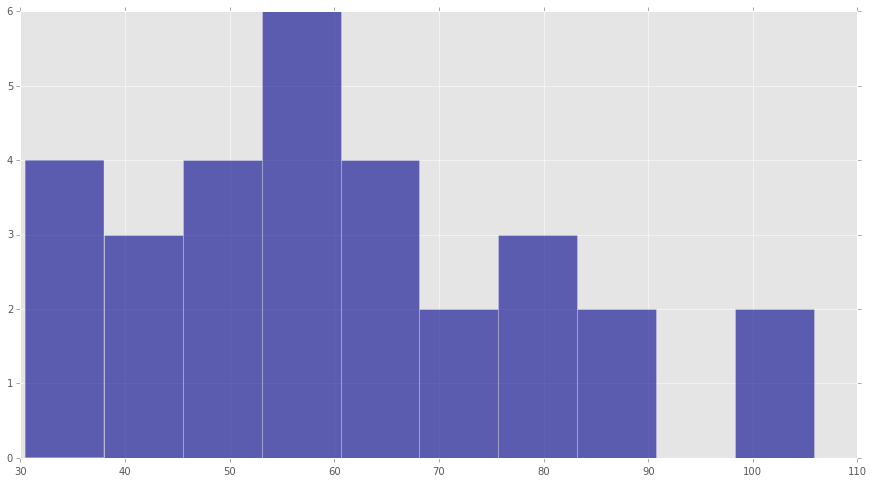

In [41]:
plt.figure(figsize=(15,8))
plt.hist(data[-1,:],color="darkblue", alpha=.6)
plt.show()

In [38]:
print data[-1]
min(data[-1])

[  30.44159357   79.5351857    65.63912447   83.31778986   44.05578491
   60.27721948   34.22211948   60.81753031   50.51855693   44.75103972
   51.88637293  103.58928322   55.14918038   87.96999598   48.85160787
   57.4788744    58.41895066   63.53552502   67.8124305    70.25265927
   78.30909501   38.49991036  105.81518404   46.59184556   54.07681866
   37.1028775    77.24484524   72.44529031   57.45025324   35.60399406]


30.441593574910428

In [43]:
best_nCorrds_mIters_bit[-1]

[0.97893954632262681,
 0.85187574477291717,
 0.073026732099958677,
 0.93817605571165363,
 -0.061128980360236194,
 -0.0080496445132324165,
 0.094061032437536427,
 -0.031141898779455862,
 1.0711014311427516,
 -1.0538980866273311,
 0.97010425494537122,
 -0.16029892360963632,
 1.0629293190637952,
 0.9158385342870069,
 -0.024632070557052434,
 -0.015316297482724932,
 0.012398614169783504,
 -1.0036388364045903,
 1.0298906452517462,
 1.1014998594368528]